In [3]:
import pandas as pd
import jieba
import numpy as np
#pip install jieba

### 数据源：http://www.sogou.com/labs/resource/ca.php ###

In [4]:
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.tail()

,category,theme,URL,content
4995,时尚,常吃六类食物快速补充水分,http://lady.people.com.cn/GB/18248366.html,随着天气逐渐炎热，补水变得日益重要。据美国《跑步世界》杂志报道，喝水并不是为身体补充水分的唯...
4996,时尚,情感：你是我的那盘菜 吃不起我走【２】,http://lady.people.com.cn/n/2012/0712/c1014-18...,我其实不想说这些话刺激他，他也是不得已。可是，我又该怎样说，怎样做？我只能走，离开这个伤心地...
4997,时尚,揭秘不老女神刘晓庆的四任丈夫（图）,http://lady.people.com.cn/n/2012/0730/c1014-18...,５８岁刘晓庆最新嫩照Ｏ衷诘牧跸庆绝对看不出她已经５８岁了，她绝对可以秒杀刘亦菲、范冰冰这类美...
4998,时尚,样板潮爸 时尚圈里的父亲们,http://lady.people.com.cn/GB/18215232.html,导语：做了爸爸就是一种幸福，无论是领养还是亲生，更何况出现在影视剧中。时尚圈永远是需要领军人...
4999,时尚,全球最美女人长啥样？中国最美女人酷似章子怡（图）,http://lady.people.com.cn/BIG5/n/2012/0727/c10...,全球最美女人合成图：：国整形外科教授李承哲，在国际学术杂志美容整形外科学会学报发表了考虑种族...


In [5]:
df_news.shape

(5000, 4)

###  分词：使用结吧分词器 ###

In [6]:
content = df_news.content.values.tolist()
print (content[4999])

全球最美女人合成图：：国整形外科教授李承哲，在国际学术杂志美容整形外科学会学报发表了考虑种族和民族脸型多样性的黑人、白人、中国人、日本人女性“最具魅力的脸型”的论文。李承哲合成这些脸型时采用的演艺人脸型有，黑人１３名、白人１６名、中国人２０名、日本人１４名等共６３名的脸型。Ｍ贾凶宰笙蛴乙来挝：黑人美女、白人美女、中国美女、日本美女和韩国美女。


In [38]:
print (content[0])

经销商　电话　试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常叮００万９阒菔邪自魄白云大道北１３６１号；广州市天河区黄埔大道西１００号富力盈泰大厦１０５室４００８－１１２２３３转９９１５＃保常福００万Ｉ蕉省淄博市张店区山泉路８９号４００８－１１２２３３转５１５６＃保常叮００万４罅保税区黄海西三路１０１号４００８－１１２２３３转２６０３＃保玻埃００万Ｌ粕绞新纺锨复兴路２１号４００８－１１２２３３转３０４３＃保常叮００万Ｖ泄云南昆明市度假区滇池路１２６８号４００８－１１２２３３转７３１２＃保常叮００万Ｒ川市兴庆区丽景北街８００号４００８－１１２２３３转３２６９＃保常叮００万９尔滨市道外区先锋路４６９号４００８－１１２２３３转２０２９＃保矗福００万３ど呈刑煨那桂花坪街道雀园路口／星沙中南汽车世界Ａ区０５号４００８－１１２２３３转７６６６＃保常梗００万Ｎ浜菏信塘城经济开发区盘龙汽车城＃矗埃埃福１１２２３３转７５２４＃保常叮００万９阒莘禺区市广路９８９号（祈福食街旁）＃矗埃埃福１１２２３３转９９６３＃保常叮００万Ｆ侄新区御桥路１３７７号４００８－１１２２３３转６３３７＃保常福００万０不帐『戏适邪河工业区纬一路２２号１３８．００万Ｉ虾Ｊ斜ι角江杨南路１３８１号４００８－１１２２３３转６７２２＃保常叮００万ｔ奚蕉路１９８号４００８－１１２２３３转５９３３＃保常叮００万１本┦谐阳区北四环望京街６８号４００８－１１２２３３转８６１５＃保玻福００万１本┦胁平区立汤路亚北博晟汽车汇展中心＃保埃福８６万＝西省南昌市青山湖区科技大道５９９号１３６．００万Ｉ苄耸信劢工业区康宁路车管所对面＃保常叮００万Ｄ暇┦薪宁区天元中路１１１号４００８－１１２２３３转５５０１＃保常叮００万３ご菏形餍戮济技术开发区长沈路４２２２号１３６．００万Ｊ家庄市北二环东路８６号河北国际汽车贸易园区＃矗埃埃福１１２２３３转３１７８＃保矗福００万８壅⑶城港路９９号广达车城永兴路３号１３６．００万Ｉ蜓羰刑西区北二中路１１号４００８－１１２２３３转２４９８＃保常叮００万３啥际星嘌虼蟮溃保福负牛ㄐ挛幕宫对面）＃保矗常８０万Ａ赡省沈阳市皇姑区鸭绿江街３２号甲（长客总站北行１５００米）＃保矗福００万Ｉ钲谑新藓区罗芳立交六星汽车园进口大众４Ｓ店４００８－１１２２３３转９８６６＃保担埃００万３ご憾环城路１００

In [44]:
content_S = []
for line in content:
    current_segment = jieba.cut(line)
    current_segment = list(current_segment)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        current_segment = [x for x in current_segment if len(x)>1]
        content_S.append(current_segment)


In [39]:
for line in content:
    current_segment = jieba.cut(line)

In [47]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, 电话, 试驾, 订车, 杭州, 滨江区, 江陵, 保常, 自魄, 白云, 大道北..."
1,"[呼叫, 热线, 服务, 邮箱]"
2,"[品牌, 二月, 曾经, 公布, 最新, 概念车, 效果图, 不过, 现在, 日内瓦, 车展..."
3,"[清仓, 甩卖, 一汽, 夏利, 威志, 低至, 启新, 中国, 一汽, 强势, 推出, 一..."
4,"[今年, 日内瓦, 车展, 我们, 见到, 高尔夫, 家族, 成员, 高尔夫, 敞篷版, 全..."


In [ ]:
#加载停用词表

In [49]:
import os
stopwords1 = [line.rstrip() for line in open(os.path.join('中文停用词库.txt'), 'r', encoding='utf-8')]
stopwords2 = [line.rstrip() for line in open(os.path.join('哈工大停用词表.txt'), 'r', encoding='utf-8')]
stopwords3 = [line.rstrip() for line in open(os.path.join('四川大学机器智能实验室停用词库.txt'), 'r', encoding='utf-8')]
stopwords = stopwords1 + stopwords2 + stopwords3
stopwords = pd.DataFrame(stopwords)
stopwords.head()

,0
0,$
1,0
2,1
3,2
4,3


In [50]:
# stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
# stopwords.head(20)

In [51]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
# stopwords = stopwords.stopword.values.tolist()
stopwords = stopwords.iloc[:,0].values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [21]:
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, 杭州, 滨江区, 江陵, 保常, 自魄, 白云, 大道北..."
1,"[呼叫, 热线, 服务, 邮箱]"
2,"[品牌, 二月, 曾经, 公布, 最新, 概念车, 效果图, 现在, 日内瓦, 车展, 品牌..."
3,"[清仓, 甩卖, 一汽, 夏利, 威志, 低至, 启新, 中国, 一汽, 强势, 推出, 一..."
4,"[今年, 日内瓦, 车展, 见到, 高尔夫, 家族, 成员, 高尔夫, 敞篷版, 全新, 敞..."


In [22]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,杭州


In [52]:
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":np.size})
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False)
words_count.head()

,all_words,count
3889,中国,3115
83773,记者,2351
82341,表示,2173
89386,进行,2084
35302,已经,1906


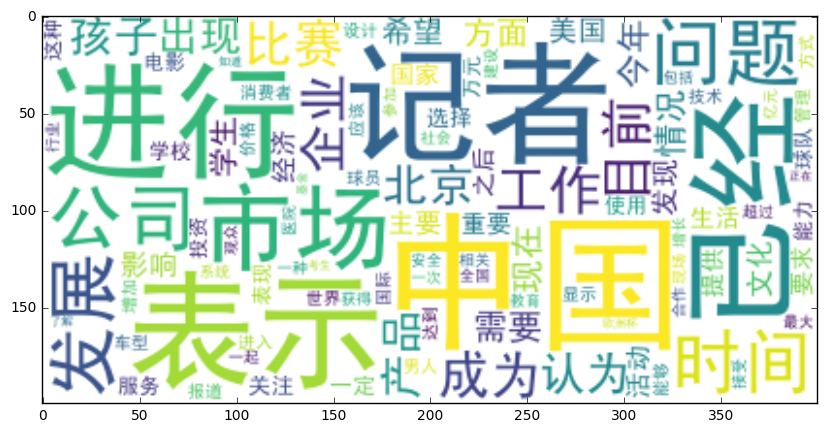

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

###  TF-IDF ：提取关键词###

In [8]:
import jieba.analyse
index = 1000
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False)))

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


NameError: name 'content_S' is not defined

###  贝叶斯建模###

格式要求：list of list形式，分词好的的整个语料

In [54]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, 杭州, 滨江区, 江陵, 保常, 自魄, 白云, 大道北...",汽车
1,"[呼叫, 热线, 服务, 邮箱]",汽车
2,"[品牌, 二月, 曾经, 公布, 最新, 概念车, 效果图, 现在, 日内瓦, 车展, 品牌...",汽车
3,"[清仓, 甩卖, 一汽, 夏利, 威志, 低至, 启新, 中国, 一汽, 强势, 推出, 一...",汽车
4,"[今年, 日内瓦, 车展, 见到, 高尔夫, 家族, 成员, 高尔夫, 敞篷版, 全新, 敞...",汽车


In [ ]:
df_train.label.unique()

In [55]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, 杭州, 滨江区, 江陵, 保常, 自魄, 白云, 大道北...",1
1,"[呼叫, 热线, 服务, 邮箱]",1
2,"[品牌, 二月, 曾经, 公布, 最新, 概念车, 效果图, 现在, 日内瓦, 车展, 品牌...",1
3,"[清仓, 甩卖, 一汽, 夏利, 威志, 低至, 启新, 中国, 一汽, 强势, 推出, 一...",1
4,"[今年, 日内瓦, 车展, 见到, 高尔夫, 家族, 成员, 高尔夫, 敞篷版, 全新, 敞...",1


In [56]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, test_size = 0.2,random_state=1)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [57]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[0]        

'艾瑞 咨询 研究 报告 显示 二季度 中国 在线视频 行业 总收入 亿元 同比 上升 在线视频 广告 收入 亿元 同比 上升 艾瑞 咨询 首席 分析师 曹军波 表示 目前 在线视频 广告 收入 五年 超过 传统 报纸广告 市场 预计 在线视频 广告 收入 超过 电视广告 芯勘 嬷赋 第二季度 综合 视频 网站 包括 客户端 软件 广告 收入 门户 网络 电视台 综合 视频 网站 广告主 数量 达到 门户 视频 网站 视频 软件 客户端 广告主 数量'

In [ ]:
print (len(words))

In [58]:
## 将文本向量化

from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']   #输入的格式要求list of str
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
cv = CountVectorizer(ngram_range=(1,4))
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [69]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words) , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [70]:
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 试题 实质 一道 概括 分析 提出 解决问题 一体 综合性 试题 一道 客观 具体 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 看出 公文 试题 类型 多样 包括 公文 事务性 文书 题材 丰富 从题 作答 要求 主要 集中 材料 内容 整合 分析 无需 创造性 发挥 纵观 历年 申论 真题 作答 要求 应用文 试题 文种 格式 作出 特别 要求 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 试题 准确 把握 作答 要求 深入 领会 内在 含义 全面 把握 题材 主旨 材料 结构 完全 轻松 应对 应用文 试题 展文 写作 原则 材料 中来 应用文 试题 主要 材料 总体 把握 客观 总结 考生 严格 坚持 材料 中来 材料 全面 把握 材料 反映 问题 准确 理解 题材 反映 主旨 政府 角度 作答 应用文 试题 更应 注重 政府 角度 坚持 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 政府 人员 角度 看待 问题 提出 问题 解决问题 掌握 文体 结构 形式 考查 重点 文体 结构 大部分 掌握 评分 关键点 解答 方法 方向 作答 题目 题干 作答 要求 明确 作答 方向 确定 作答 角度 关键 向导 考生 仔细阅读 题干 作答 要求 抓住 关键词 明确 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 题为 潦惺姓 准备 大力 宣传 推进 近海 水域 污染 整治 工作 结合 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 保对 宣传 内容 要点 进行 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 问题 原因 解决 对策 作答 思路 情况 问题 原因 对策 意义 逻辑 顺序 安排 文章 结构 缶殖 结构 解答 应用文 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 存在 问题 解决 对策 明确 阅读文章 心里 构建 文章 结构 直至 快速 解答 乘悸 罚明 逻辑 应用文 试题

In [71]:
classifier.score(vec.transform(test_words), y_test)

0.79100000000000004

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [74]:
vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)
classifier.score(vectorizer.transform(test_words), y_test)

0.81699999999999995